In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/home/hp/DBDA/ML/machine-learning/Assignments/claimants.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isna().any()

In [ ]:
df.head(3)

In [ ]:
df["CLMSEX"].fillna(df['CLMSEX'].mode()[0],inplace=True)
df["CLMINSUR"].fillna(df['CLMINSUR'].mean(),inplace=True)
df["SEATBELT"].fillna(df['SEATBELT'].mode()[0], inplace=True)
df["CLMAGE"].fillna(df['CLMAGE'].mode()[0], inplace=True)

In [19]:
x = df[['CLMAGE', 'CLMSEX', 'SEATBELT', 'CLMINSUR', 'LOSS']]
y = df['ATTORNEY']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=123456)

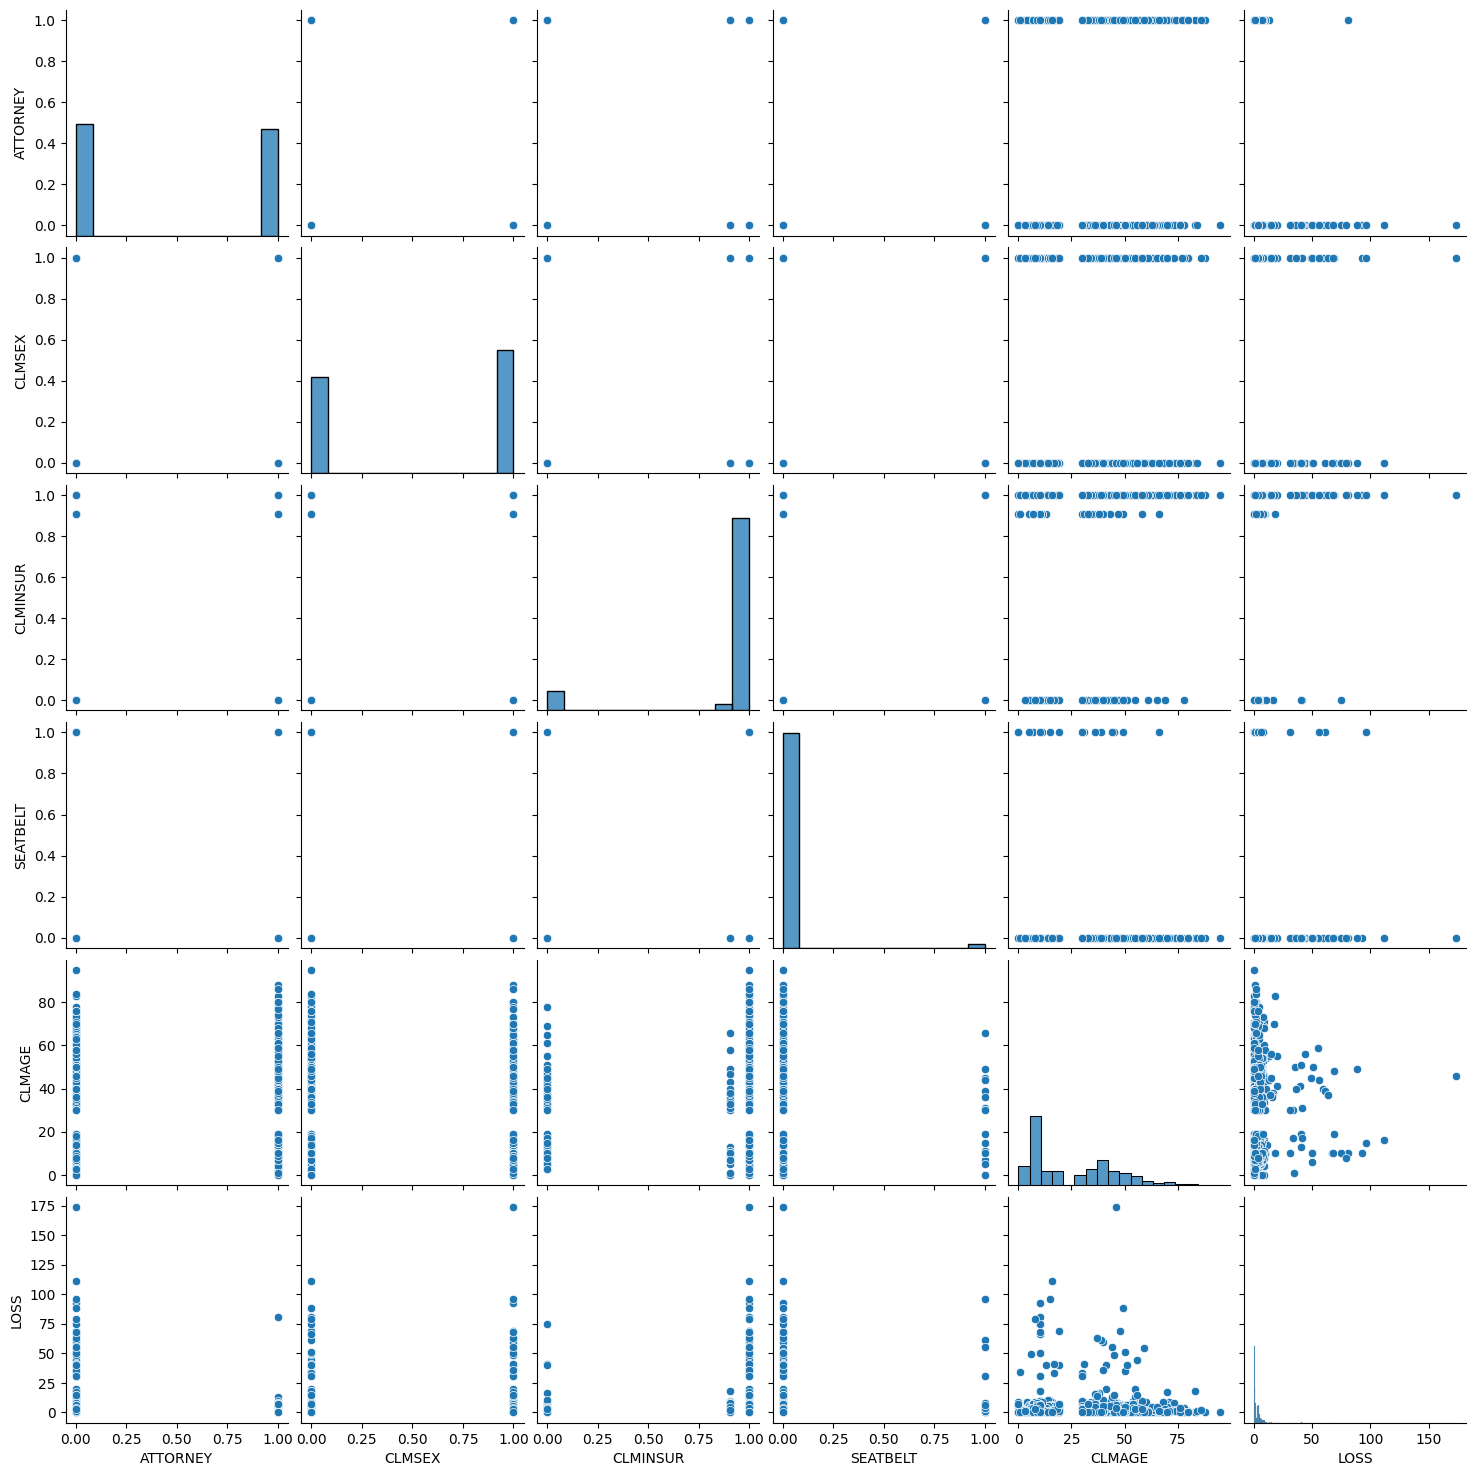

In [21]:
sns.pairplot(df)

In [22]:
def train_model_adaboot():
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier()
    model.fit(x_train, y_train)
    return model

In [23]:
def train_model_catboost():
    from catboost import CatBoost
    model = CatBoost()
    model.fit(x_train, y_train)
    return model

In [24]:
def train_model_xgboost():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    return model

In [25]:
models = [
    (train_model_catboost(), 'CabBoost'),
    (train_model_adaboot(), 'AdaBoost'),
    (train_model_xgboost(), 'XG Boost')
]

Learning rate set to 0.041395
0:	learn: 0.4959675	total: 1.36ms	remaining: 1.36s
1:	learn: 0.4930455	total: 2.89ms	remaining: 1.44s
2:	learn: 0.4893857	total: 3.59ms	remaining: 1.19s
3:	learn: 0.4860313	total: 4.03ms	remaining: 1s
4:	learn: 0.4826305	total: 4.87ms	remaining: 970ms
5:	learn: 0.4793609	total: 5.66ms	remaining: 938ms
6:	learn: 0.4764308	total: 6.67ms	remaining: 946ms
7:	learn: 0.4732800	total: 7.7ms	remaining: 955ms
8:	learn: 0.4704714	total: 8.93ms	remaining: 984ms
9:	learn: 0.4678591	total: 9.8ms	remaining: 970ms
10:	learn: 0.4654905	total: 10.7ms	remaining: 958ms
11:	learn: 0.4630700	total: 11.4ms	remaining: 943ms
12:	learn: 0.4611232	total: 12.3ms	remaining: 934ms
13:	learn: 0.4593155	total: 13.3ms	remaining: 936ms
14:	learn: 0.4577354	total: 14.1ms	remaining: 927ms
15:	learn: 0.4559246	total: 15.4ms	remaining: 948ms
16:	learn: 0.4543107	total: 16.5ms	remaining: 954ms
17:	learn: 0.4528478	total: 17.6ms	remaining: 958ms
18:	learn: 0.4516359	total: 18.2ms	remaining: 939

/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [26]:
def evaluate_model(model, model_name):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    y_pred = model.predict(x_test)
    y_true = y_test
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return model_name, accuracy , precision, recall, f1

In [27]:
data = []
for (model, model_name) in models:
    data.append(evaluate_model(model, model_name))

result = pd.DataFrame(data, columns=['Algorithm', 'Accuracy','Precision','Recall','F1_Score'])
result



ValueError: Classification metrics can't handle a mix of binary and continuous targets